### Load libraries

In [1]:
%load_ext autoreload
%autoreload 2


Imports

In [2]:
import numpy as np
import numba as nb
import pandas as pd
import scipy as sp
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import mpmath as mp
from matplotlib.transforms import Bbox
from InitCondPOHomogeous import InitCondPOHomogeneous
from InitPO_2 import InitCondPOHomogeneous_2



# 1. Structural connectivity matrix
### 1.1 Read data: 

3 columns: i j value

In [3]:
data=np.load('NormalizedMatrix.npz')
norm_matrix = data['normalized_matrix']

In [4]:
norm_matrix.shape

(90, 90)

In [5]:
np.ones(90)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.])

In [6]:
norm_matrix[0,1]

np.float64(0.07150787333365484)

In [7]:
prod = norm_matrix@np.ones(90)
prod[4]

np.float64(0.9999999999999999)

In [8]:
mult = np.sum(norm_matrix*np.ones(90),axis=1)
mult

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.])

In [4]:
np.sum(norm_matrix,axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.])

# 2. Simulations Network Next Generation Model

In [9]:
from NextGenPopModel import NextGenPopModel

## 2.1. Integrate network Synchronized

In [15]:
#Initial and final times of integration
t0 = 0
tf = 1000
#Discretization used for integration
h = 0.001 #0.01
#Number of points to evaluate the time integration
N = int((tf-t0)/h)
time_eval = np.linspace(t0, tf, N)
#Number of variables and equations of the model
Nvariables = 6 #Number of variables of each population model
Npop = 90
Neq = Npop*Nvariables #Number of variables of the whole network
#Initial condition homogeneous or perturb
x0 = np.zeros(Neq)#np.random.uniform(0, 0.01, Neq)

#Dictionary containing parameters of the model
ParametersPop = dict(tau_e = 8,
              tau_i = 8,
              tau_se=1,
              tau_si=5,
              nu_e = -5,
              nu_i = -5,
              Delta_e = 1,
              Delta_i = 1,
              Jee = 5,
              Jei = 13,
              Jii = 5,
              Jie = 13,
              Iext_i=0,
              Iext_e=10,
              eps=19)

#Iext_e=13,eps=8
#Iext_e=10,eps=8
#Iext_e=7,eps=10


In [16]:
solNetwork = solve_ivp(NextGenPopModel, [t0,tf], x0, t_eval=time_eval, method='RK45', rtol=1e-6, atol=1e-9,args=(norm_matrix, Nvariables, Npop, ParametersPop))

### Group variables in corresponding matrices

In [17]:
#Define indices
idx_ve = 1
idx_se = 2
idx_ri = 3
idx_vi = 4
idx_si = 5
#Define matrices of each variable of each population
r_e_matrix = solNetwork.y[0:90,:]
v_e_matrix = solNetwork.y[90*idx_ve:90*idx_se,:]
s_e_matrix = solNetwork.y[90*idx_se:90*idx_ri,:]
r_i_matrix = solNetwork.y[90*idx_ri:90*idx_vi,:]
v_i_matrix = solNetwork.y[90*idx_vi:90*idx_si,:]
s_i_matrix = solNetwork.y[90*idx_si:90*6,:]

### Plot variables of first population

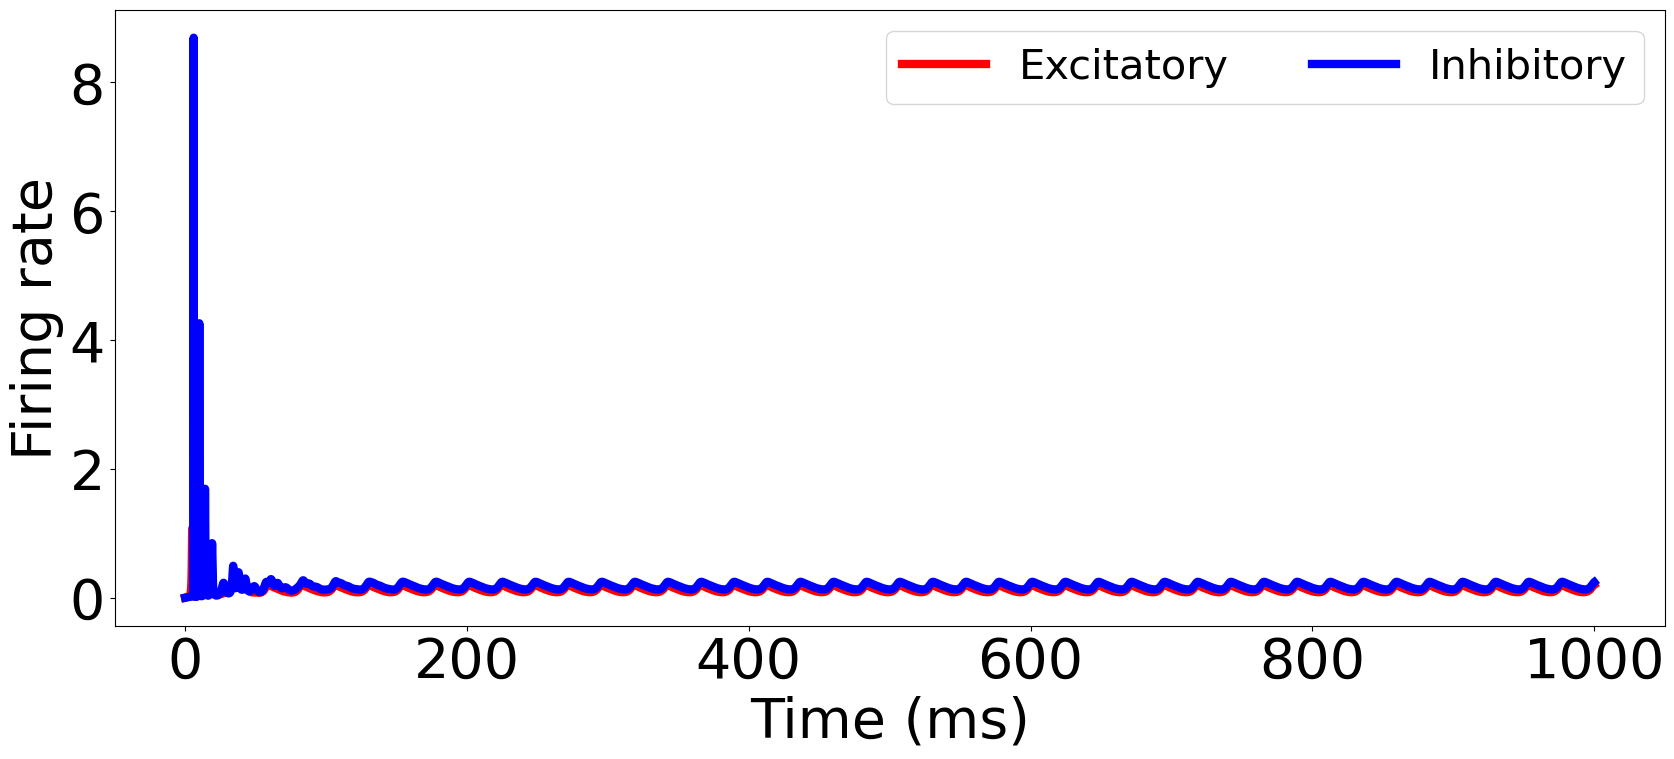

In [18]:
fig1=plt.figure(figsize=(20,8))
ax=plt.axes()
plt.plot(solNetwork.t,r_e_matrix[0,:],color='red',linewidth=6,label='Excitatory')
plt.plot(solNetwork.t,r_i_matrix[0,:],color='blue',linewidth=6,label='Inhibitory')
plt.xlabel("Time (ms)",fontsize=40)
plt.ylabel("Firing rate",fontsize=40)
plt.xticks(fontsize=40)#,rotation=45)
plt.yticks(fontsize=40)
ax.legend(loc="upper right",fontsize=30,ncol=2)
plt.show()
plt.close()

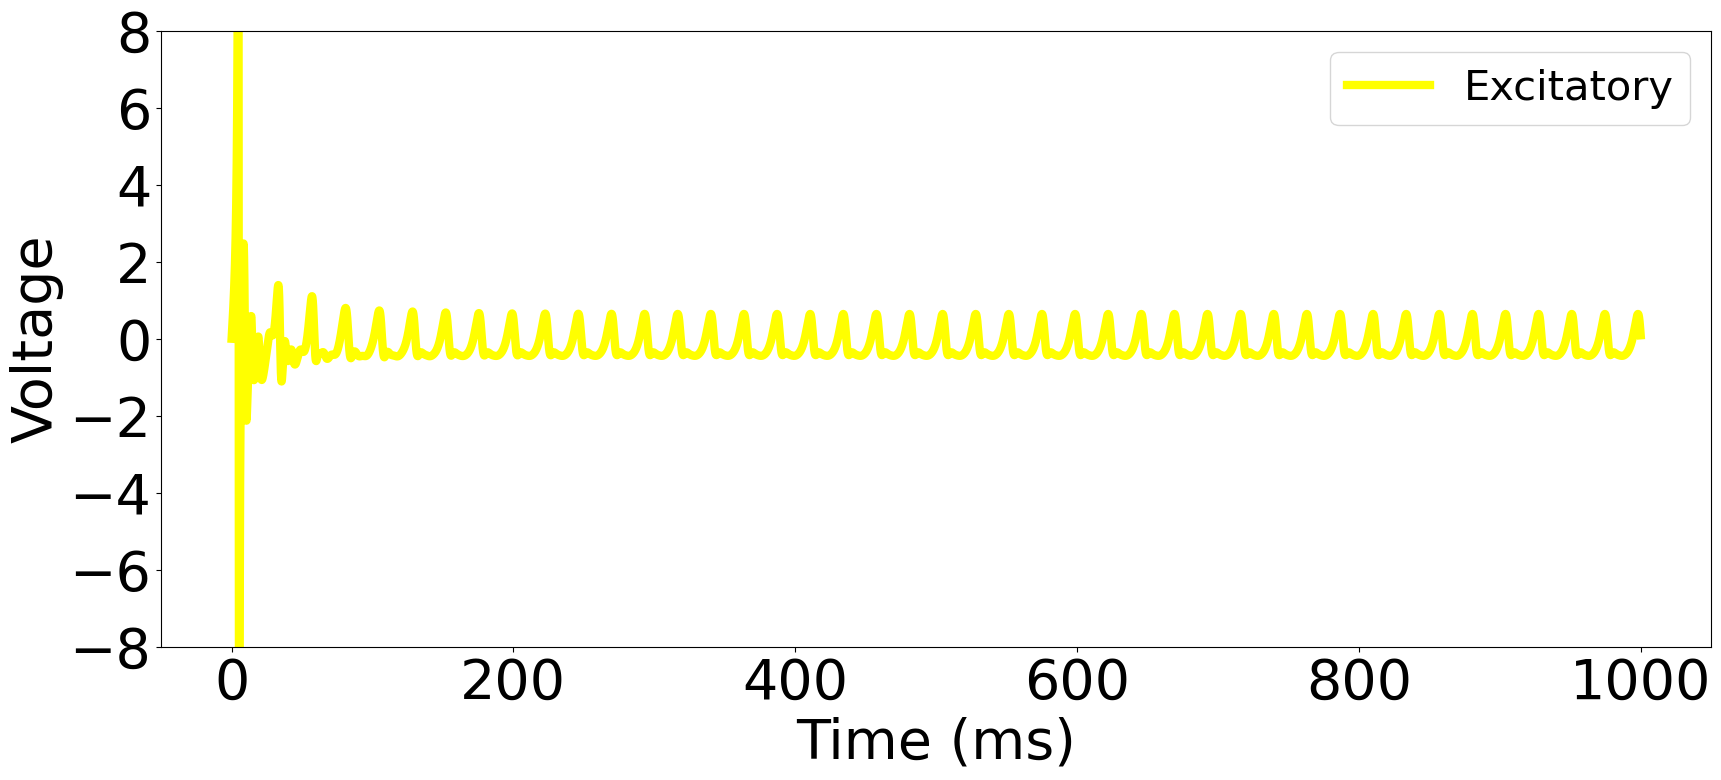

In [19]:
fig1=plt.figure(figsize=(20,8))
ax=plt.axes()
#plt.plot(solPerturbedNetwork.t,v_i_matrix[0,:],color='orange',linewidth=6,label='Inhibitory')
plt.plot(solPerturbedNetwork.t,v_e_matrix[0,:],color='yellow',linewidth=6,label='Excitatory')
plt.xlabel("Time (ms)",fontsize=40)
plt.ylabel("Voltage",fontsize=40)
plt.xticks(fontsize=40)#,rotation=45)
plt.yticks(fontsize=40)
ax.legend(loc="upper right",fontsize=30,ncol=2)
plt.ylim([-8,8])
plt.show()
plt.close()

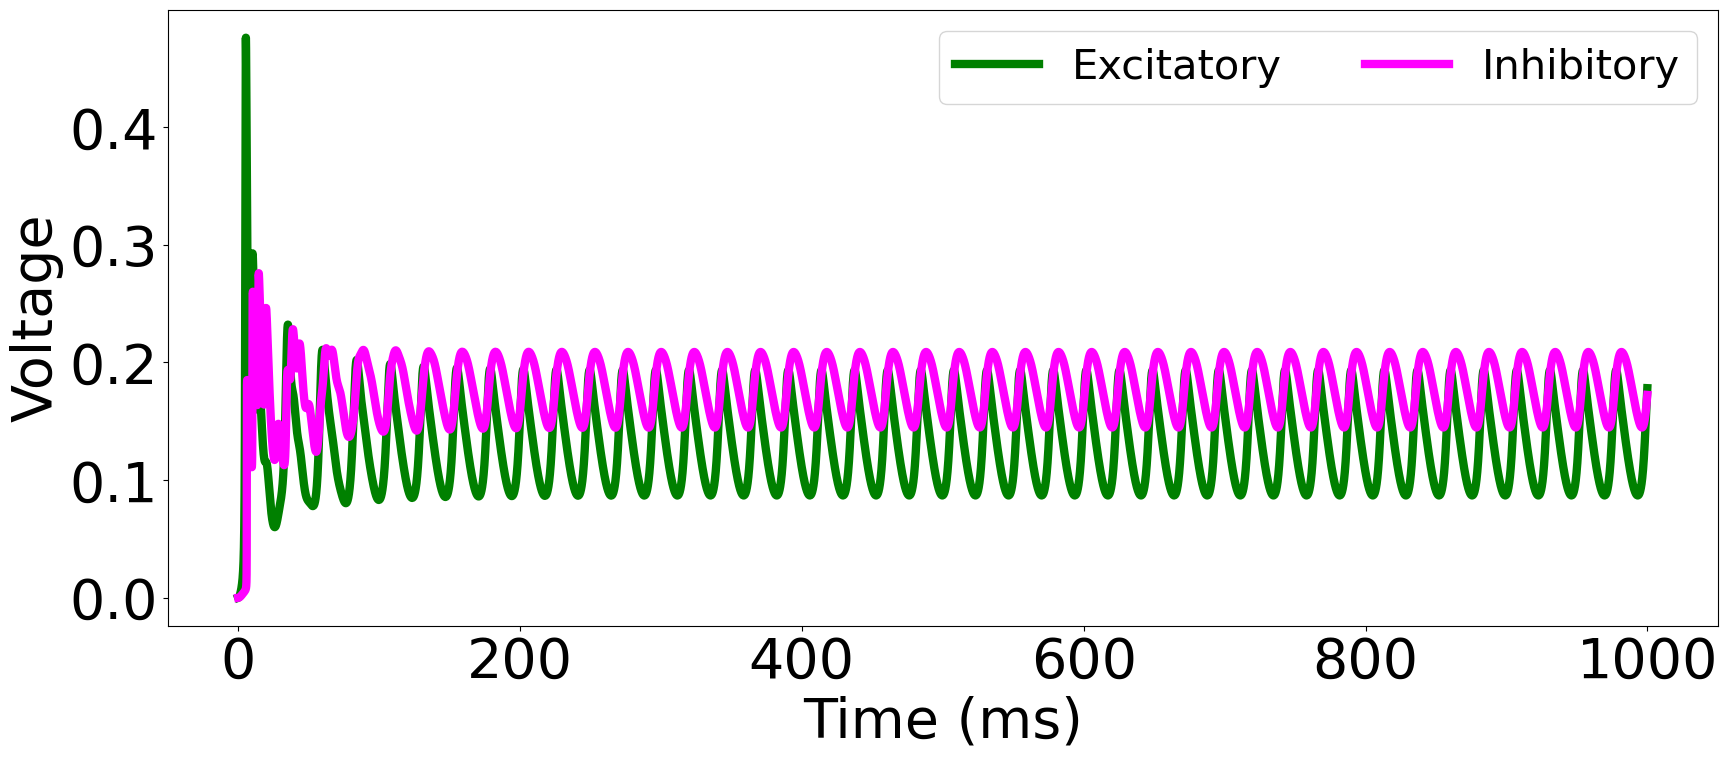

In [20]:
fig1=plt.figure(figsize=(20,8))
ax=plt.axes()
plt.plot(solNetwork.t,s_e_matrix[0,:],color='green',linewidth=6,label='Excitatory')
plt.plot(solNetwork.t,s_i_matrix[0,:],color='magenta',linewidth=6,label='Inhibitory')
plt.xlabel("Time (ms)",fontsize=40)
plt.ylabel("Voltage",fontsize=40)
plt.xticks(fontsize=40)#,rotation=45)
plt.yticks(fontsize=40)
ax.legend(loc="upper right",fontsize=30,ncol=2)
plt.show()
plt.close()

#### Play with the ylabels

In [16]:
len(solNetwork.t)*h

1000.0

In [274]:
edgesxlabel = np.arange(len(solNetwork.t)*h+1)

In [275]:
np.arange(len(solNetwork.t)+1,step=200/h)

array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.])

In [276]:
np.arange(len(solNetwork.t)+1,step=200/h)*h

array([   0.,  200.,  400.,  600.,  800., 1000.])

In [277]:
np.arange(len(solNetwork.t)*h+1)/(2*h)

array([     0.,    500.,   1000., ..., 499000., 499500., 500000.])

In [ ]:
edgesxlabel

array([   0.,    1.,    2., ...,  998.,  999., 1000.])

In [24]:
ms_idx = 100
np.arange(ms_idx+1,step=10)

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

In [30]:
np.arange(ms_idx+1,step=10)/h

array([     0.,  10000.,  20000.,  30000.,  40000.,  50000.,  60000.,
        70000.,  80000.,  90000., 100000.])

### Plot all populations

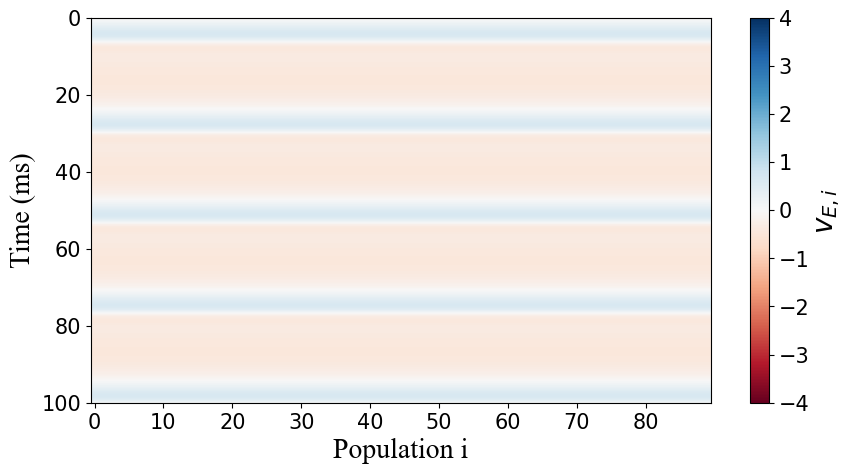

In [21]:
ms_idx = 100
fig2=plt.figure(figsize=(10,5))
plt.imshow(np.transpose(v_e_matrix[:,len(solNetwork.t)-int(ms_idx/h):len(solNetwork.t)]), cmap='RdBu', interpolation='nearest',vmin=-4, vmax=4)
#plt.imshow(np.transpose(v_e_matrix), cmap='RdBu', interpolation='nearest',vmin=-2, vmax=2)
plt.gca().set_aspect('auto')
cbar = plt.colorbar()
#edgesyticks = np.arange(len(solNetwork.t)+1,step=200/h)
#edgesylabels = (np.arange(len(solNetwork.t)+1,step=200/h)*h).astype(int)

edgesyticks = np.arange(ms_idx+1,step=20)/h
edgesylabels = (np.arange(ms_idx+1,step=20)).astype(int)
plt.xticks(fontsize=15)#,rotation=45)
plt.yticks(fontsize=15)
plt.yticks(ticks=edgesyticks,labels=edgesylabels,fontsize=15)
plt.xlabel('Population i',fontsize=20,fontname='Times New Roman')
plt.ylabel('Time (ms)',fontsize=20,fontname='Times New Roman')
cbar.set_label(r'$v_{E,i}$', fontsize=20,fontname='Times New Roman')
cbar.ax.tick_params(labelsize=15)

## 2.1. Integrate network Perturbed

In [10]:
#Initial and final times of integration
t0 = 0
tf = 1000
#Discretization used for integration
h = 0.001
#Number of points to evaluate the time integration
N = int((tf-t0)/h)
time_eval = np.linspace(t0, tf, N)
#Number of variables and equations of the model
Nvariables = 6 #Number of variables of each population model
Npop = 90
Neq = Npop*Nvariables #Number of variables of the whole network

#Dictionary containing parameters of the model
ParametersPop = dict(tau_e = 8,
              tau_i = 8,
              tau_se=1,
              tau_si=5,
              nu_e = -5,
              nu_i = -5,
              Delta_e = 1,
              Delta_i = 1,
              Jee = 5,
              Jei = 13,
              Jii = 5,
              Jie = 13,
              Iext_i=0,
              Iext_e=12,
              eps=12)

#Iext_e=10,eps=15

### Compute initial condition of Periodic Orbit

In [11]:
status,x0_PO,T = InitCondPOHomogeneous_2(Nvariables,ParametersPop)

Exit status:  1
Exit message:  The solution converged.
Function evaluations:  12
Final residuals:  [-8.32667268e-17 -8.32667268e-17  2.66453526e-15 -8.32667268e-17
 -3.05311332e-16 -2.66453526e-15 -8.32667268e-17]


In [12]:
x0_PO

array([0.14214756, 1.30313942, 0.10968275, 0.10205945, 1.52743616,
       0.08838671])

In [13]:
re_0 = np.repeat(x0_PO[0],90)
ve_0 = np.repeat(x0_PO[1],90)
se_0 = np.repeat(x0_PO[2],90)
ri_0 = np.repeat(x0_PO[3],90)
vi_0 = np.repeat(x0_PO[4],90)
si_0 = np.repeat(x0_PO[5],90)
extended_x0_PO = np.hstack([re_0,ve_0,se_0,ri_0,vi_0,si_0])

In [14]:
np.random.normal(0, 0.01, 90*6)

array([-2.54965346e-03, -4.59361271e-03,  1.25325320e-02, -1.28247073e-02,
        7.74474494e-03,  7.58069427e-03,  1.05333184e-02, -2.23710114e-03,
       -5.41109498e-03, -5.21250066e-03,  1.02010751e-02,  2.22540132e-03,
        9.19979497e-03,  5.81142983e-03, -4.83232985e-03,  1.27472656e-02,
       -7.77542534e-03,  1.58495220e-02,  2.11805083e-03,  1.14055718e-02,
        9.08734170e-03,  3.78108039e-03,  5.90453664e-03, -1.72996045e-03,
       -1.55525457e-02, -5.89585390e-03,  1.05871269e-02, -7.68953095e-03,
        2.27677448e-03, -5.57851786e-04,  1.37153798e-02, -1.92044569e-02,
       -1.19628567e-03, -8.57645217e-03, -5.11812011e-03,  4.64343979e-03,
       -4.98250095e-03,  4.37743322e-03,  2.96898021e-04, -1.51657708e-03,
        7.77155090e-03, -5.20272212e-03, -2.59982926e-03, -7.09357245e-03,
        1.01049983e-02, -1.65487334e-02,  1.01844413e-02,  1.49197114e-02,
        1.13061675e-02, -9.49588592e-03, -8.75133025e-03,  3.07218946e-03,
        4.63118322e-04, -

In [15]:
#Initial condition on homogeneous to perturb
x0 = extended_x0_PO + np.random.normal(0, 0.01, Neq)#np.random.uniform(0, 0.1, Neq)

In [16]:
solPerturbedNetwork = solve_ivp(NextGenPopModel, [t0,tf], x0, t_eval=time_eval, method='RK45', rtol=1e-6, atol=1e-9,args=(norm_matrix, Nvariables, Npop, ParametersPop))

### Group variables in corresponding matrices

In [17]:
#Define indices
idx_ve = 1
idx_se = 2
idx_ri = 3
idx_vi = 4
idx_si = 5
#Define matrices of each variable of each population
r_e_matrix = solPerturbedNetwork.y[0:90,:]
v_e_matrix = solPerturbedNetwork.y[90*idx_ve:90*idx_se,:]
s_e_matrix = solPerturbedNetwork.y[90*idx_se:90*idx_ri,:]
r_i_matrix = solPerturbedNetwork.y[90*idx_ri:90*idx_vi,:]
v_i_matrix = solPerturbedNetwork.y[90*idx_vi:90*idx_si,:]
s_i_matrix = solPerturbedNetwork.y[90*idx_si:90*6,:]

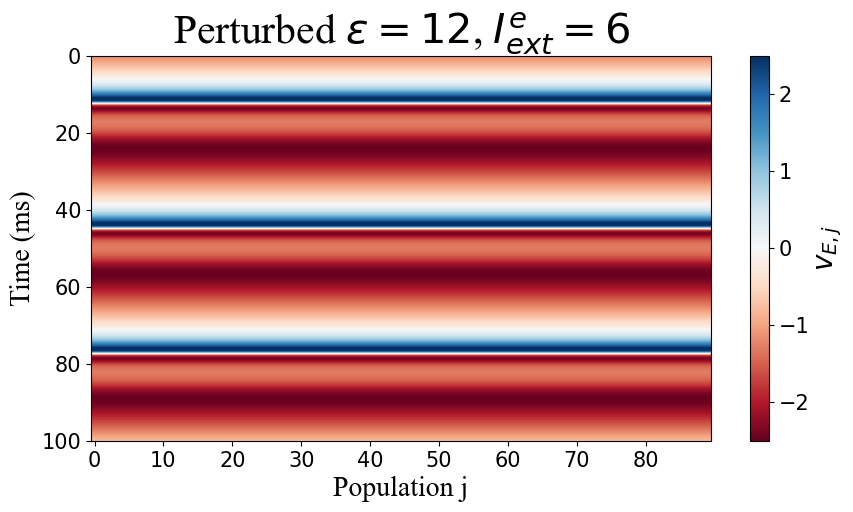

In [16]:
ms_idx = 100
fig2=plt.figure(figsize=(10,5))
plt.imshow(np.transpose(v_e_matrix[:,len(solPerturbedNetwork.t)-int(ms_idx/h):len(solPerturbedNetwork.t)]), cmap='RdBu', interpolation='nearest',vmin=-2.5, vmax=2.5)
#plt.imshow(np.transpose(v_e_matrix), cmap='RdBu', interpolation='nearest',vmin=-3, vmax=2)
plt.gca().set_aspect('auto')
cbar = plt.colorbar()
#edgesyticks = np.arange(len(solNetwork.t)+1,step=200/h)
#edgesylabels = (np.arange(len(solNetwork.t)+1,step=200/h)*h).astype(int)

edgesyticks = np.arange(ms_idx+1,step=20)/h
edgesylabels = (np.arange(ms_idx+1,step=20)).astype(int)
plt.xticks(fontsize=15)#,rotation=45)
plt.yticks(fontsize=15)
plt.yticks(ticks=edgesyticks,labels=edgesylabels,fontsize=15)
plt.xlabel('Population j',fontsize=20,fontname='Times New Roman')
plt.ylabel('Time (ms)',fontsize=20,fontname='Times New Roman')
plt.title(r'Perturbed $\epsilon = '+ f'{ParametersPop['eps']}$' + r', $I_{ext}^e = '+ f'{ParametersPop['Iext_e']}$',fontsize=30,fontname='Times New Roman')
cbar.set_label(r'$v_{E,j}$', fontsize=20,fontname='Times New Roman')
cbar.ax.tick_params(labelsize=15)
plt.savefig('Definitive/Perturbed__eps'+str(ParametersPop['eps'])+'Iext_e__'+str(ParametersPop['Iext_e'])+'.png',dpi=500,bbox_inches=Bbox([[0,-1],fig2.get_size_inches()]))

In [18]:
v_e_matrix.shape

(90, 1000000)

In [21]:
mean.shape

(1000000,)

In [20]:
mean = np.mean(v_e_matrix,axis=0)

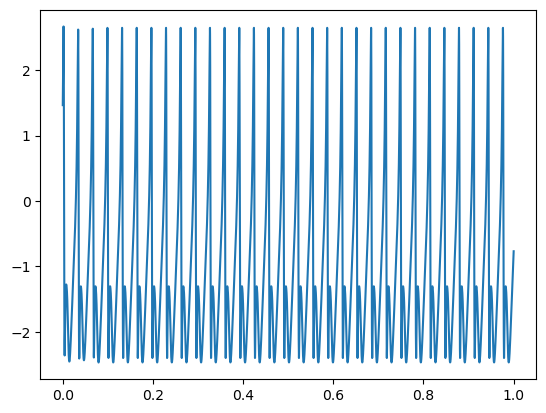

In [28]:
plt.plot(solPerturbedNetwork.t/1000,mean)

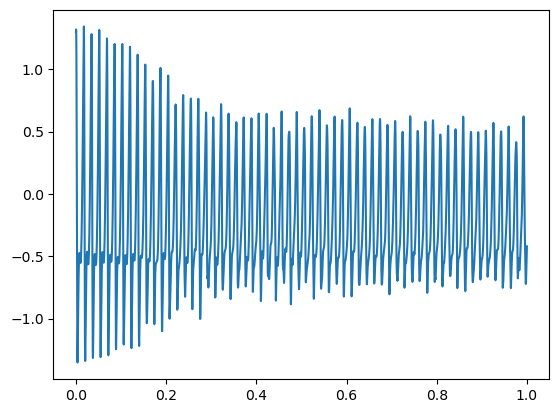

In [22]:
plt.plot(solPerturbedNetwork.t/1000,mean)